<h3> Resume </h3>

In [1]:
# This is a WebCrawler in Python script.
# Python version: 3.10
# Created on 2022-02-01
# Author: Vinicius Brito

# Objective: This code was created to extract data from South America World Cup Qualifiers classification table on an website from
# Brazil named GloboEsporte.com

# Versions Control:
#   Date        Describe
#   2022-01-29  Release

<h3>Libraries</h3>

In [2]:
# import required libraries

# pip install requests
# pip install numpy
# pip install pandas

import requests as req
import numpy as np
import pandas as pd
from datetime import date
from lxml import html

<h3>Request data</h3>

In [3]:
# to request data from website
html = req.get("https://ge.globo.com/futebol/copa-do-mundo/eliminatorias-america-do-sul/")

# check downloaded content
# html.content

# convert content to text
html = html.text


In [4]:
# define content limits of classification table

ini_datatable = html.find("{\"classificacao\":[{") # inferior limit parameter of classification table in html
end_datatable = html.find("}],") # upper limit parameter of classification table in html
full_datatable = html [ini_datatable+18:end_datatable+1] # only data of classification table in html
#print(full_datatable)

# extract data from one of each national team in table and store in a list

data = []
i = 0
while i < 10: # limit is 10 because have only 10 teams in South America
    ini_param = full_datatable.find("\"nome_popular\":") # inferior limit parameter
    end_param = full_datatable.find(",\"saldo_gols\":") # upper limit parameter
    full_param = full_datatable [ini_param:end_param] # datas from a national team
    x = full_param.replace('\"','').replace('nome_popular:','').replace('ordem:','').replace('pontos:','').replace("\\u00f4","ô").replace('\\u00ed','í')
    #print(x.split(",")) 
    data.append(x.split(","))
    full_datatable = full_datatable [end_param+13:] # in each loop the limits of 'full_datatable' change
    i = i + 1

<h3>Transform list in Data frame </h3>

In [5]:
# convert list into DataFrame
df = pd.DataFrame(data)

#df =pd.to_numeric(0)
#df =pd.to_numeric(1)

# rename columns of DataFrame
df = df.rename(columns={0: "National Team", 1: "Position", 2: "Points"})

# convert the numeric columns to int
df.Position=pd.to_numeric(df.Position)
df.Points=pd.to_numeric(df.Points)

# check the DataFrame
df.head(10)

,National Team,Position,Points
0,Brasil,1,39
1,Argentina,2,35
2,Equador,3,27
3,Uruguai,4,22
4,Peru,5,20
5,Chile,6,19
6,Colômbia,7,17
7,Bolívia,8,15
8,Paraguai,9,13
9,Venezuela,10,10


<h3>Generate Chart</h3>

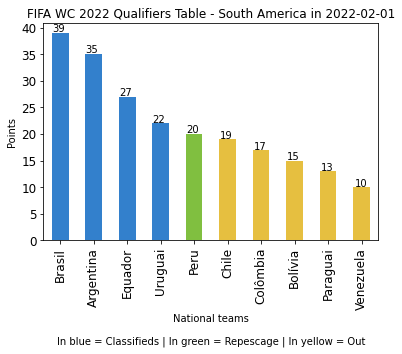

In [6]:
# Define the plot itens
df_plot = df.head(10)

# Customize the colors of graph. obs.: In South America the top-4 go to WC, the fifth dispute a repescage and the others don't can dispute nothing. 
my_colors = [(0.2,0.5,0.8),(0.2,0.5,0.8),(0.2,0.5,0.8),(0.2,0.5,0.8),(0.5, 0.75, 0.25),(0.9, 0.75, 0.25),(0.9, 0.75, 0.25),(0.9, 0.75, 0.25),(0.9, 0.75, 0.25),(0.9, 0.75, 0.25)] # <-- make two custom RGBs and repeat/alternate them over all the bar elements.

# Collect date for Graph title
today = date.today() # English format: YYYY-mm-dd
today = today.strftime("%Y-%m-%d") # English format: YYYY-mm-dd
#today = today.strftime("%d/%m/%Y") # Brazil format: dd/mm/YY

# Plot the graph
df_plot = df_plot.plot(kind='bar',x='National Team',y='Points',title='FIFA WC 2022 Qualifiers Table - South America in '+ today ,  fontsize='12', color=my_colors, legend=False)

# Insert labels in axis
df_plot.set_xlabel('National teams'+ '\n' + '\n' + 'In blue = Classifieds | In green = Repescage | In yellow = Out' )
df_plot.set_ylabel('Points')

# Insert annotates in columns
for p in df_plot.patches:
    df_plot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.009))